In [1]:
import nltk
import re
from collections import Counter
from itertools import islice

## test corpus

In [4]:
test_corpus = []
with open('../data/test_v2.txt','rt') as file:
    file.readline()
    for line in file:
        comma_pos = line.find(',')
        words = re.sub('"', '', line[comma_pos+1:]).lower()
#         words = re.sub('[0-9]',"#",words)
        test_corpus.append(nltk.word_tokenize(words))

## sentence's length

In [3]:
import matplotlib.pyplot as plt

In [4]:
sent_len_counter = Counter()
for step, sentence in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    sent_len_counter[len(sentence)] += 1
    
min_len = min(sent_len_counter.keys())
max_len = max(sent_len_counter.keys())
print(f'min sentence length: {min_len}')
print(f'max sentence length: {max_len}')

min sentence length: 0
max sentence length: 996


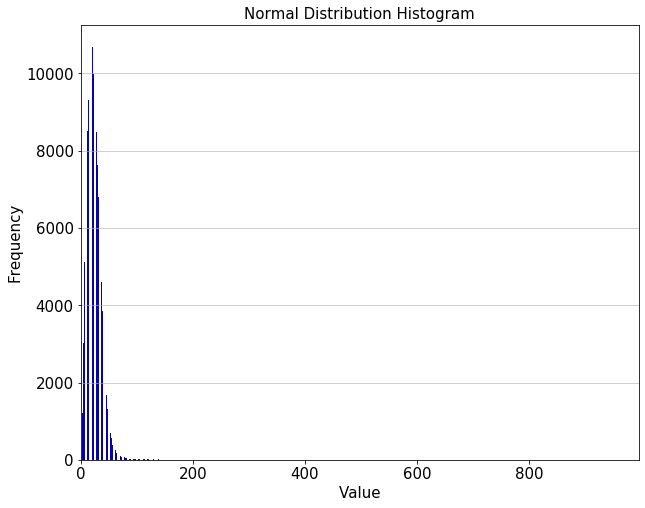

In [5]:
plt.figure(figsize=[10,8])

plt.bar(sent_len_counter.keys(), sent_len_counter.values(), width = 0.5, color='#0504aa')#, alpha=0.7)
plt.xlim(min_len, max_len)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

## ngrams frequency

In [6]:
unigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for token in line:
        unigram_counter[token] += 1

In [7]:
print(f'number of all unigram in test corpus: {len(unigram_counter)}')
unigram_counter.most_common(30)

number of all unigram in test corpus: 159740


[('the', 402020),
 (',', 342277),
 ('.', 310630),
 ('to', 178207),
 ('of', 168734),
 ('a', 160164),
 ('and', 158065),
 ('in', 144187),
 ('that', 67490),
 ("'s", 66412),
 ('for', 65828),
 ('on', 57408),
 ('is', 54571),
 ('with', 45371),
 ('was', 45145),
 ('it', 44682),
 ('said', 42003),
 ('as', 39376),
 ('he', 38611),
 ('at', 37377),
 ('by', 33483),
 ('from', 32106),
 ('be', 30163),
 ('his', 29807),
 ('have', 29134),
 ('has', 28797),
 ('but', 27430),
 ('are', 27330),
 ('an', 24998),
 ('not', 23329)]

In [95]:
def get_windows(seq, n, need_sorted=False):
    it = iter(seq)
    result = list(islice(it, n))
    if len(result) == n:
        if need_sorted:
            result = sorted(result)
        yield tuple(result)
    for elem in it:
        result = result[1:] + [elem,]
        if need_sorted:
            result = sorted(result)
        yield tuple(result)

In [9]:
bigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for bigram in list(get_windows(line, 2)):
        bigram_counter[bigram] += 1

In [10]:
# test version
bigram_counter2 = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    bigram_counter2.update(get_windows(line, 2))

In [11]:
print(f'number of all bigram in test corpus: {len(bigram_counter)}')
bigram_counter.most_common(30)

number of all bigram in test corpus: 1877243


[(('of', 'the'), 38841),
 (('in', 'the'), 35334),
 ((',', 'the'), 24234),
 ((',', 'and'), 18767),
 (('to', 'the'), 16578),
 (('on', 'the'), 13130),
 (('for', 'the'), 13090),
 ((',', 'a'), 11441),
 (('said', '.'), 10755),
 (('at', 'the'), 10724),
 (('and', 'the'), 10330),
 ((',', 'but'), 10170),
 (('in', 'a'), 9837),
 ((',', 'which'), 9425),
 (('to', 'be'), 8911),
 ((',', 'said'), 8653),
 (('with', 'the'), 7869),
 ((',', 'he'), 7696),
 ((',', 'who'), 7676),
 (('from', 'the'), 7582),
 (('that', 'the'), 7528),
 (('of', 'a'), 7326),
 (('by', 'the'), 7047),
 (('as', 'a'), 5684),
 (('with', 'a'), 5287),
 (('to', 'a'), 5260),
 (('more', 'than'), 5259),
 (('for', 'a'), 5172),
 (('has', 'been'), 5172),
 (('will', 'be'), 5086)]

In [12]:
trigram_counter = Counter()
for step, line in enumerate(test_corpus):
    if not (step % 1000):
        print("working on {}kth line".format(step // 1000), end='\r')
    for trigram in list(get_windows(line, 3)):
        trigram_counter[trigram] += 1

In [13]:
print(f'number of all trigram in test corpus: {len(trigram_counter)}')
trigram_counter.most_common(30)

number of all trigram in test corpus: 4583562


[((',', 'he', 'said'), 3088),
 (('one', 'of', 'the'), 2580),
 (('he', 'said', '.'), 2531),
 ((',', 'according', 'to'), 2346),
 (('(', 'ap', ')'), 2275),
 (('the', 'united', 'states'), 2223),
 ((',', 'and', 'the'), 1883),
 (('ap', ')', '-'), 1788),
 (('as', 'well', 'as'), 1436),
 (('the', 'end', 'of'), 1296),
 (('upi', ')', '--'), 1289),
 (('(', 'upi', ')'), 1275),
 ((',', 'which', 'is'), 1172),
 (('the', 'world', "'s"), 1111),
 ((',', 'but', 'the'), 1102),
 (('(', 'reuters', ')'), 1069),
 (('reuters', ')', '-'), 1047),
 (('according', 'to', 'the'), 1013),
 (('some', 'of', 'the'), 956),
 (('in', 'the', 'first'), 942),
 ((',', 'said', 'the'), 908),
 (('part', 'of', 'the'), 895),
 ((',', 'she', 'said'), 879),
 (('the', 'company', "'s"), 875),
 (('the', 'first', 'time'), 872),
 (('for', 'the', 'first'), 854),
 (('the', 'country', "'s"), 844),
 (('out', 'of', 'the'), 822),
 (('the', 'new', 'york'), 804),
 ((',', 'however', ','), 800)]

## distribution

In [14]:
from collections import defaultdict

In [15]:
def get_windows(seq, n):
    it = iter(seq)
    result = list(islice(it, n))
    if len(result) == n:
        output = tuple(result[:n-1]), result[-1]
        yield output
    for elem in it:
        result = result[1:] + [elem,]
        output = tuple(result[:n-1]), result[-1]
        yield output

In [16]:
unigram_dist = defaultdict(lambda: 0)
bigram_dist = defaultdict(lambda: 0)
trigram_dist = defaultdict(lambda: 0)

# unigram distrubution counting
n_unigram = len(unigram_counter)
for word in unigram_counter:
    unigram_dist[word] /= n_unigram
    
# bigram distrubution counting
for bigram in bigram_counter:
    bigram_dist[bigram] = bigram_counter[bigram] / unigram_counter[bigram[0]]
    
# trigram distrubution counting
for trigram in trigram_counter:
    trigram_dist[trigram] = trigram_counter[bigram] / bigram_counter[trigram[:2]]

# Pos-tag ngrams

In [17]:
nltk.download('averaged_perceptron_tagger')
import seaborn as sns

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\persi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [146]:
def plot_top_counter(counter, n=30):    
    top = counter.most_common(n)
    x, y = zip(*top)
    x, y = list(x),list(y)
    plt.figure(figsize=[15,15])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    sns.barplot(x=y,y=x)

In [164]:
sentences_with_tags = nltk.pos_tag_sents(test_corpus)

tagged_unigrams_counter = Counter()
for sentence in sentences_with_tags:
    tagged_unigrams_counter.update(sentence)
    
unigram_tags_counter = Counter()
for uni_tag, count in tagged_unigrams_counter.items():
    _, tag = uni_tag
    unigram_tags_counter.update({tag : count})

number of all unique UNIGRAM-TAG pair in test corpus: 227093
number of all unique unigram's tags in test corpus: 43


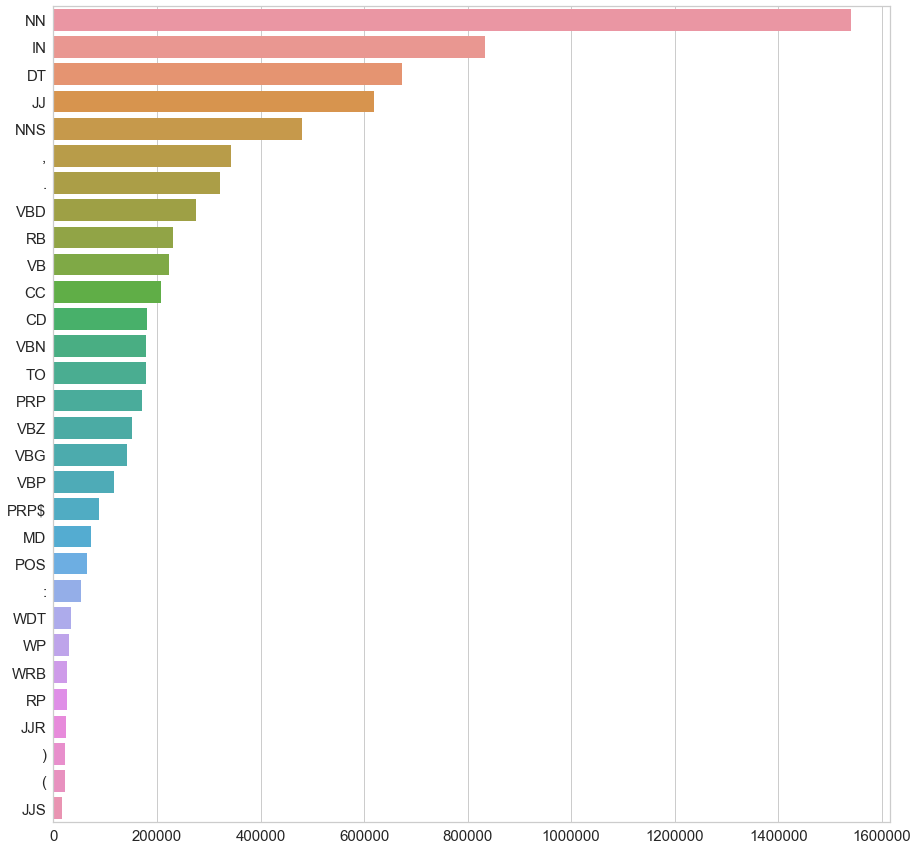

In [165]:
print(f"number of all unique UNIGRAM-TAG pair in test corpus: {len(tagged_unigram_counter)}")
print(f"number of all unique unigram's tags in test corpus: {len(tags_counter)}")
plot_top_counter(unigram_tags_counter)

## Let's see the most frequent instances of individual parts of speech

In [166]:
def plot_top_pos_instances(tagged_unigrams_counter, pos, n):
    instances_counter = Counter({tag[0]:count for tag, count in tagged_unigrams_counter.items() if tag[1]==pos})
    top = instances_counter.most_common(n)
    x, y = zip(*top)
    x, y = list(x),list(y)
    plt.figure(figsize=[10,10])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title(f'top instances for tag {pos}',fontsize=13)
    sns.barplot(x=y,y=x)

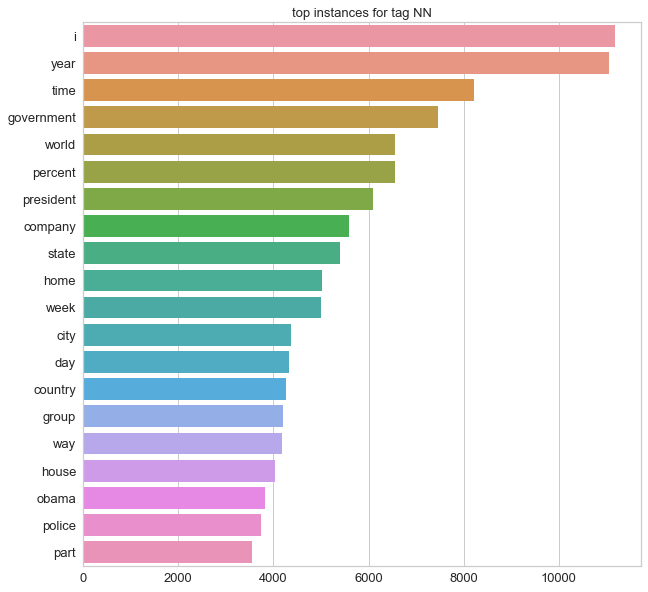

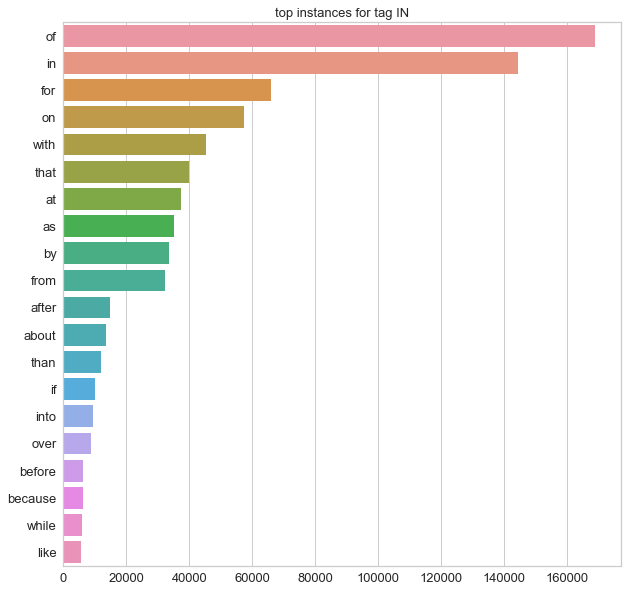

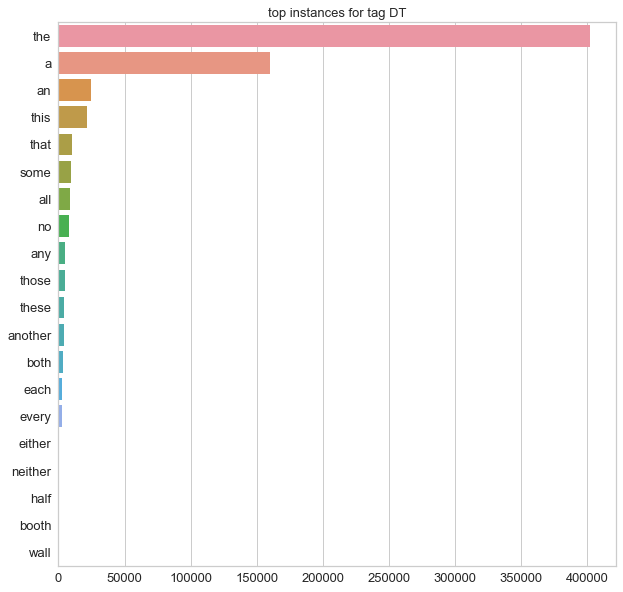

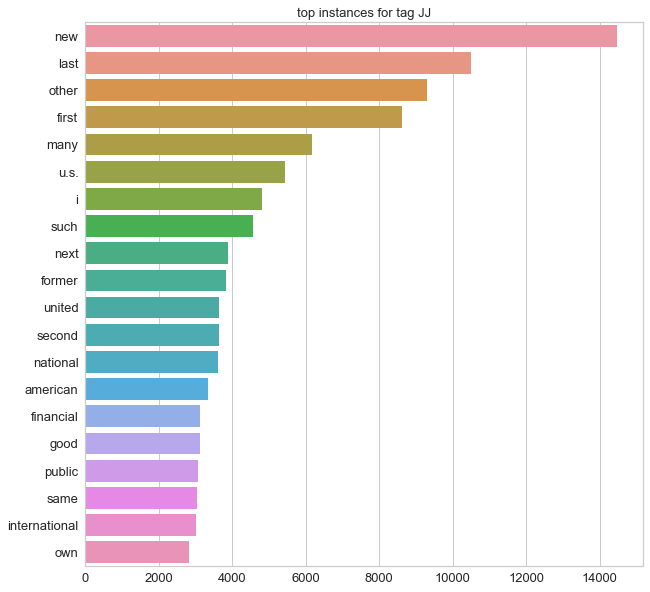

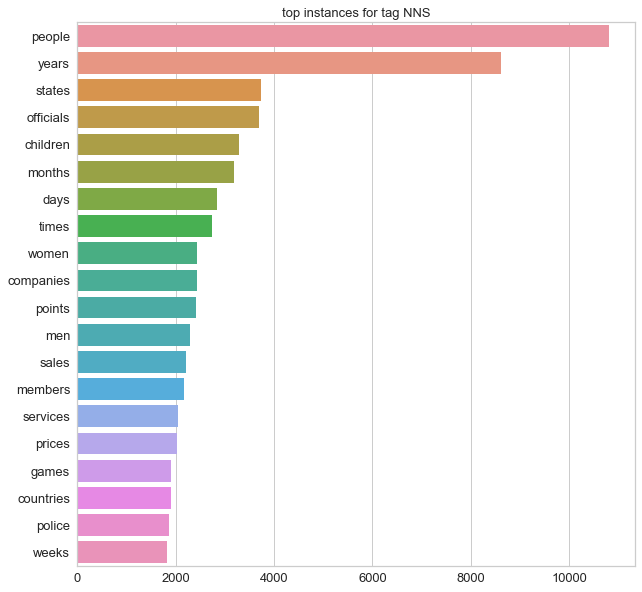

In [168]:
for tag, _ in unigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_unigrams_counter, tag, 20)

# Bigrams 

In [99]:
tagged_bigrams_counter = Counter()
for sentence in sentences_with_tags:
    tagged_bigrams_counter.update(get_windows(sentence,2))

In [131]:
bigram_tags_counter = Counter()
for tagged_bigram, count in tagged_bigrams_counter.items():
    _, tags = zip(*tagged_bigram)
    bigram_tags_counter.update({repr(tags):count})

number of all unique BIGRAM-TAG pair in test corpus: 2048648
number of all unique bigram's tags in test corpus: 1533


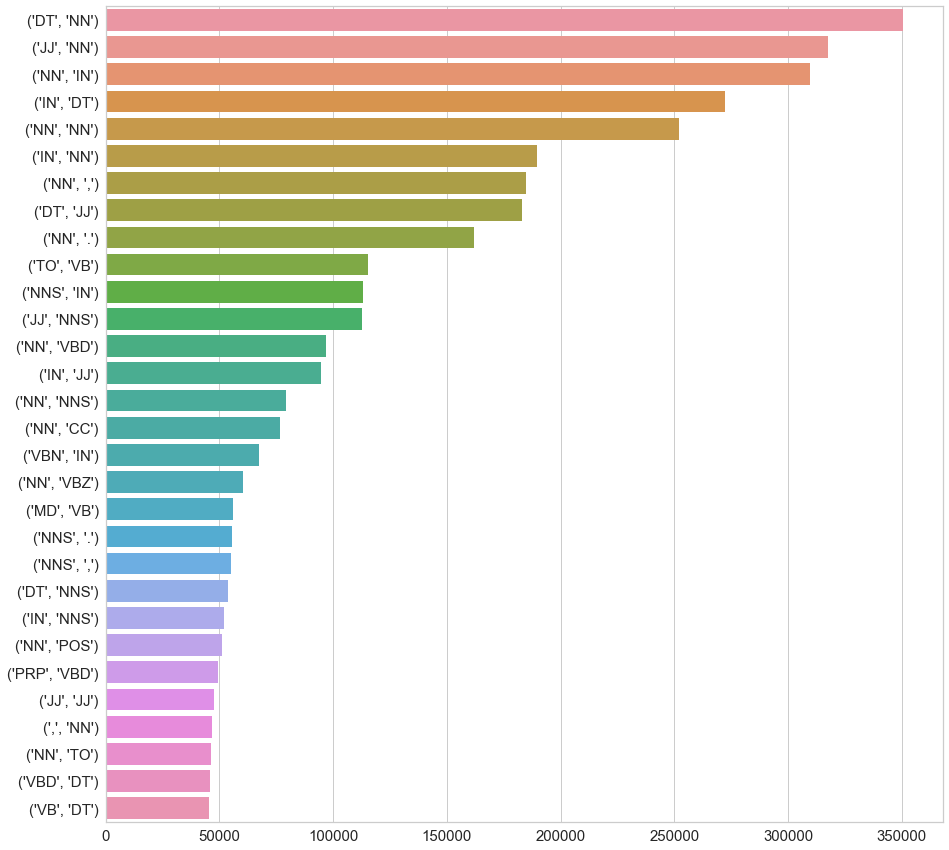

In [132]:
print(f"number of all unique BIGRAM-TAG pair in test corpus: {len(tagged_bigrams_counter)}")
print(f"number of all unique bigram's tags in test corpus: {len(bigram_tags_counter)}")
plot_top_counter(bigram_tags_counter)

In [137]:
def plot_top_pos_instances(tagged_ngrams_counter, pos, n):
    instances_counter = Counter()
    for tagged_ngram, count in tagged_ngrams_counter.items():
        ngram, tags = zip(*tagged_ngram)
        if repr(tags) == pos:
            instances_counter.update({repr(ngram):count})
    top = instances_counter.most_common(n)
    x, y = zip(*top)
    x, y = list(x),list(y)
    plt.figure(figsize=[10,10])
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.title(f'top instances for tags {pos}',fontsize=13)
    sns.barplot(x=y,y=x)

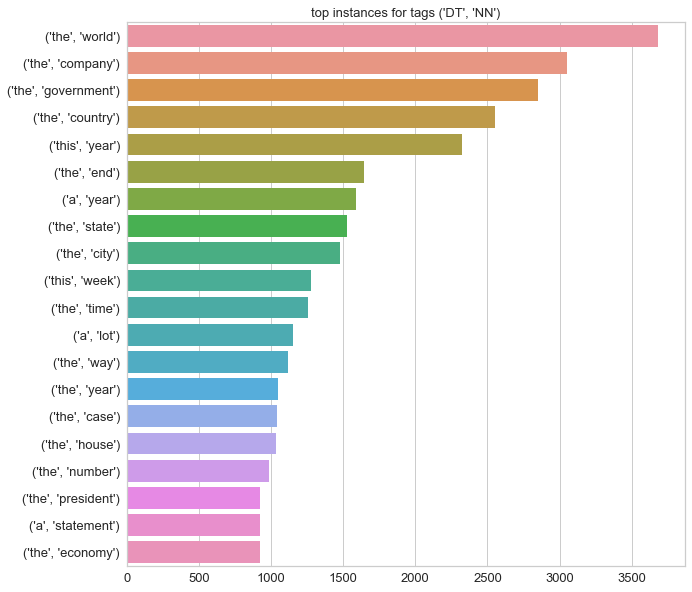

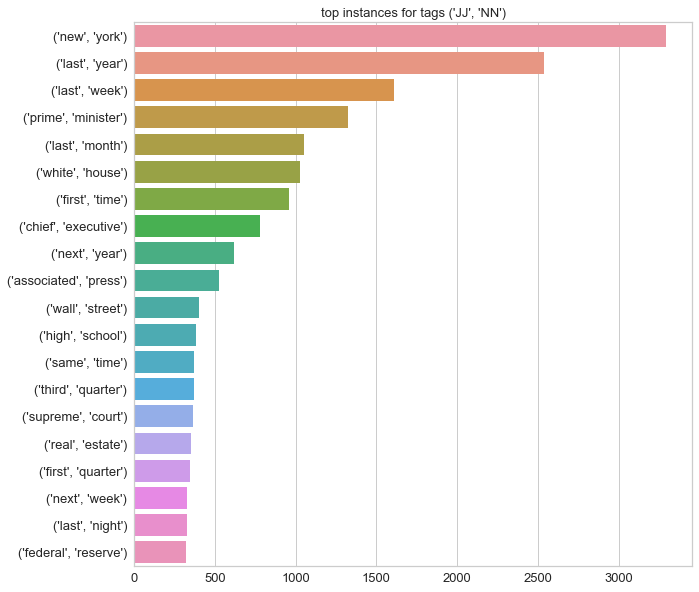

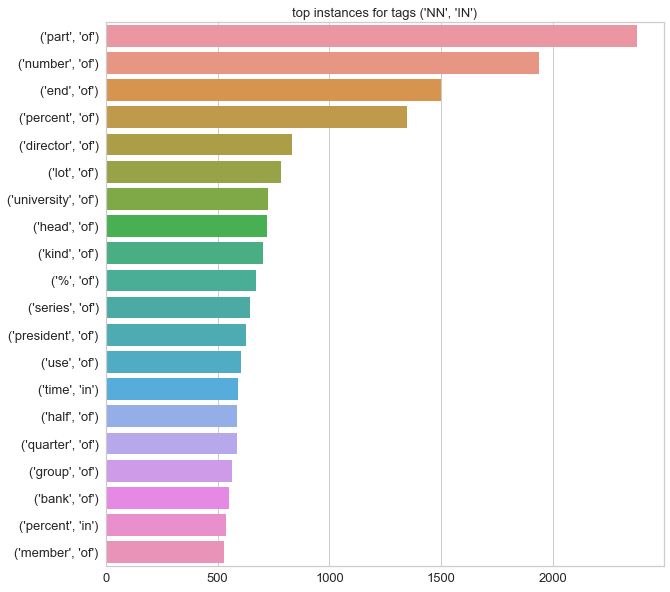

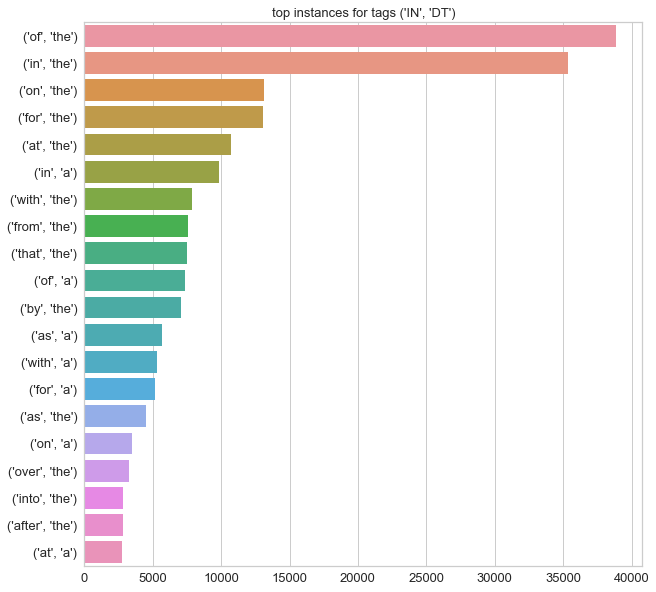

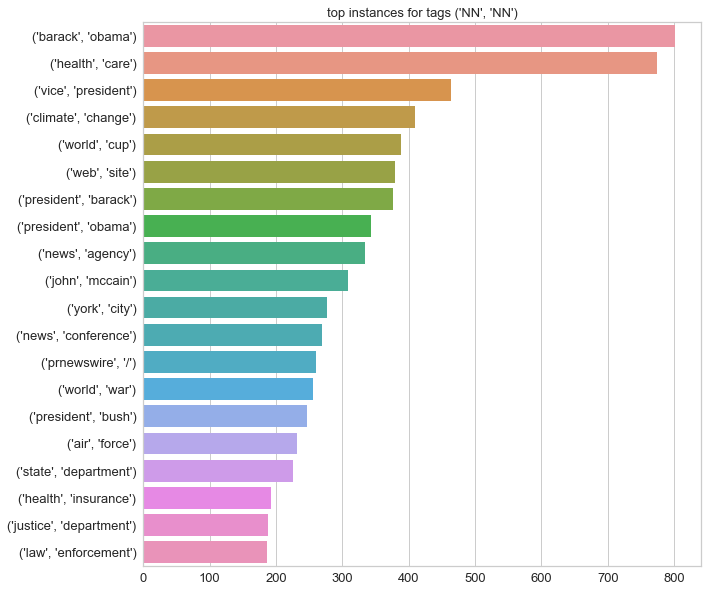

In [138]:
for tags, _ in bigram_tags_counter.most_common(5):
    plot_top_pos_instances(tagged_bigrams_counter, tags, 20)